In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Este código importa las bibliotecas necesarias para el tratamiento de datos, la visualización y el modelado. Utiliza pandas y numpy para manejar datos, matplotlib y seaborn para crear gráficos, y sklearn para el preprocesamiento y modelado de un clasificador SVR. Configura parámetros de visualización en matplotlib y silencia las advertencias durante la ejecución.

In [ ]:
datos = pd.read_csv('uac_limpio.csv' , sep=';')
datos.head(3)

,ESCUELA,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,PPAnterior
0,ADMINISTRACIÓN,20,1,0,0,0,0,2,4,14.128,14.389
1,ADMINISTRACIÓN,27,0,0,0,1,0,2,5,12.796,12.632
2,ADMINISTRACIÓN,22,0,0,0,1,1,1,10,14.906,15.381


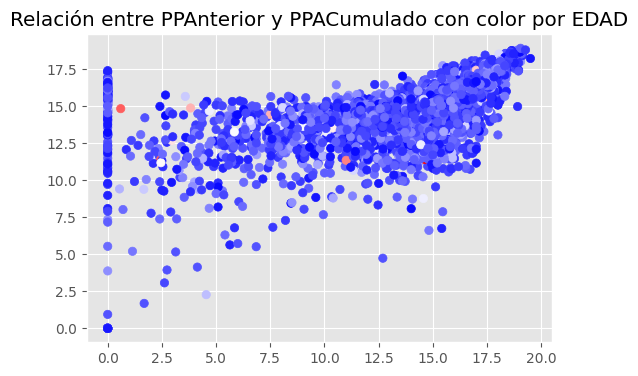

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(datos['PPAnterior'], datos['PPACumulado'], c=datos['EDAD'])
ax.set_title("Relación entre PPAnterior y PPACumulado con color por EDAD")
plt.show()

Este fragmento de código crea un gráfico de dispersión utilizando matplotlib, donde se representan las variables PPAnterior y PPACumulado del conjunto de datos. Los puntos se colorean según la variable EDAD, y se establece un título para el gráfico. Finalmente, se muestra el gráfico en la pantalla.

In [ ]:
# División de los datos en train y test
# ==============================================================================

X = pd.get_dummies(datos.drop(columns=['PPACumulado', 'ESCUELA']), drop_first=True)  # No usar 'ESCUELA'
y = datos['PPACumulado']  # Asegúrate de que esta es tu variable objetivo correcta

# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

realiza la división de un conjunto de datos en conjuntos de entrenamiento y prueba. Primero, utiliza pd.get_dummies para convertir variables categóricas en variables dummy, excluyendo las columnas PPACumulado y ESCUELA. Luego, separa PPACumulado como la variable objetivo y. A continuación, utiliza train_test_split para dividir los datos en un 80% para entrenamiento y un 20% para prueba, asegurando que la división sea aleatoria mediante random_state y permitiendo el barajado de los datos.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Creación del modelo SVR (Support Vector Regression)
# ==============================================================================
modelo = SVR(C=100, kernel='linear')  # Aquí usamos SVR para regresión

# Entrenamiento del modelo
modelo.fit(X_train, y_train)


SVR(C=100, kernel='linear')

Si tu objetivo es un valor continuo, como parece ser el caso, deberías utilizar un modelo de regresión en lugar de uno de clasificación. Para un modelo de regresión basado en vectores soporte, debes usar SVR (Support Vector Regression) en lugar de SVC.

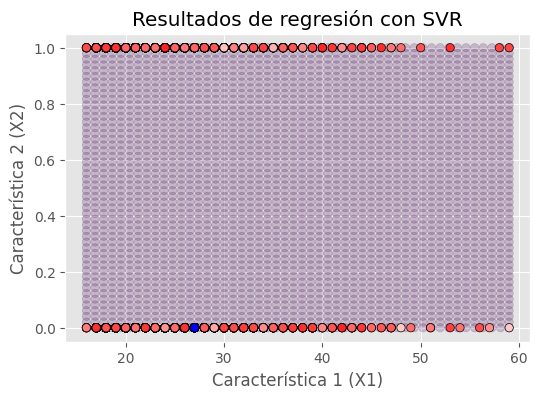

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Supongamos que tus datos están en un DataFrame llamado 'datos'
# y que has realizado la división de los datos en train y test previamente.

# Crear el modelo SVR (Support Vector Regression)
modelo = SVR(C=100, kernel='linear')

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Seleccionar las dos primeras columnas de X_train para graficar
# Asegúrate de que estas columnas sean numéricas
x1 = X_train.iloc[:, 0]  # Primera característica
x2 = X_train.iloc[:, 1]  # Segunda característica

# Crear un grid para graficar la regresión
# Crear un rango de valores para x1 y x2
x1_range = np.linspace(np.min(x1), np.max(x1), 50)
x2_range = np.linspace(np.min(x2), np.max(x2), 50)

# Crear un meshgrid para las características
X1, X2 = np.meshgrid(x1_range, x2_range)

# Crear un DataFrame para el grid, asegurándote de que todas las características estén presentes
grid = pd.DataFrame({
    'X1': X1.ravel(),
    'X2': X2.ravel(),
})

# Añadir columnas dummy según las características originales
grid = pd.get_dummies(grid, drop_first=True)

# Alinear las columnas del grid con las columnas de X_train
grid = grid.reindex(columns=X_train.columns, fill_value=0)  # Asegúrate de que las columnas coincidan

# Predicción de los valores para el grid
pred_grid = modelo.predict(grid)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(6, 4))

# Representación de las predicciones sobre el grid
# Usar el valor predicho para definir los colores
ax.scatter(X1, X2, c=pred_grid, alpha=0.2, cmap='viridis')

# Graficar los puntos reales del entrenamiento
ax.scatter(x1, x2, c=y_train, alpha=1, edgecolor='k')

# Título y etiquetas
ax.set_title("Resultados de regresión con SVR")
ax.set_xlabel("Característica 1 (X1)")
ax.set_ylabel("Característica 2 (X2)")

plt.show()


Este código entrena un modelo de regresión de soporte vectorial (SVR) utilizando las dos primeras características de un conjunto de datos, representadas como Característica 1 (X1) y Característica 2 (X2), que corresponden a variables numéricas influyentes en PPACumulado. Se genera un grid de valores para estas características y se realizan predicciones sobre él, que se grafican en una dispersión donde los colores representan los valores predichos por el modelo. Los puntos reales del conjunto de entrenamiento también se incluyen en la gráfica, lo que permite visualizar cómo se relacionan las características seleccionadas con las predicciones del modelo y entender mejor los patrones en los datos.

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([16.2110819 , 16.41717452, 15.45680882, ..., 15.09748632,
       15.64993966, 14.7098402 ])

utiliza el modelo de regresión de soporte vectorial (SVR) previamente entrenado para realizar predicciones sobre el conjunto de datos de prueba, X_test. Las predicciones se almacenan en la variable predicciones, que contiene los valores estimados de la variable objetivo (PPACumulado) para las observaciones en el conjunto de prueba. Esto permite evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE) y raíz del error cuadrático medio (RMSE)
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, predicciones)

# Mostrar resultados
print("")
print(f"El RMSE del modelo en el conjunto de prueba es: {rmse}")
print(f"El R² del modelo en el conjunto de prueba es: {r2}")



El RMSE del modelo en el conjunto de prueba es: 1.5456202675039061
El R² del modelo en el conjunto de prueba es: 0.2609449944124499


evalúa el rendimiento del modelo de regresión de soporte vectorial (SVR) utilizando métricas comunes: el error cuadrático medio (MSE), la raíz del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Primero, calcula el MSE entre las predicciones del modelo y los valores reales del conjunto de prueba (y_test), y luego obtiene el RMSE al tomar la raíz cuadrada del MSE. A continuación, calcula el R², que mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Finalmente, imprime el RMSE y el R², proporcionando una idea de la precisión del modelo y su capacidad para explicar la variación en los datos.

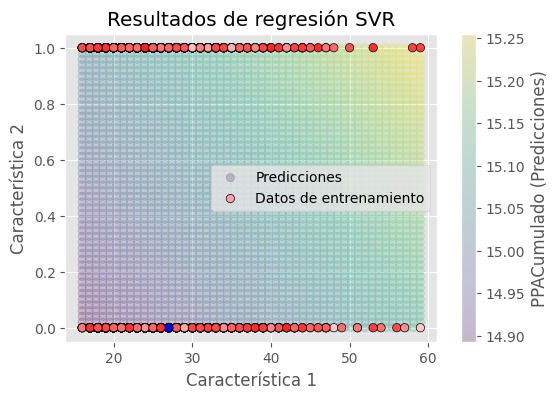

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Asegúrate de que 'datos' es tu DataFrame original
# División de los datos en train y test
X = pd.get_dummies(datos.drop(columns=['PPACumulado', 'ESCUELA']), drop_first=True)  # No usar 'ESCUELA'
y = datos['PPACumulado']  # Variable objetivo

# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

# Creación del modelo SVR
modelo = SVR(C=100, kernel='linear')  # Usamos SVR para regresión

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Visualización de resultados
# Asegúrate de que el modelo SVR esté entrenado
# Grid de valores para las dos primeras características
x1 = np.linspace(np.min(X_train.iloc[:, 0]), np.max(X_train.iloc[:, 0]), 50)  # Rango para la primera característica
x2 = np.linspace(np.min(X_train.iloc[:, 1]), np.max(X_train.iloc[:, 1]), 50)  # Rango para la segunda característica
Y, X = np.meshgrid(x2, x1)  # Crear la malla
grid = np.vstack([X.ravel(), Y.ravel()]).T  # Crear el grid para predicciones

# Rellenar el grid con el promedio de las otras características
num_features = X_train.shape[1]
for i in range(2, num_features):
    grid = np.hstack((grid, np.full((grid.shape[0], 1), X_train.iloc[:, i].mean())))

# Predicción de valores en el grid
pred_grid = modelo.predict(grid)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(6, 4))

# Representar las predicciones en el grid
sc = ax.scatter(grid[:, 0], grid[:, 1], c=pred_grid, alpha=0.2, cmap='viridis', label='Predicciones')
# Graficar los puntos de entrenamiento
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', alpha=1, label='Datos de entrenamiento')

# Personalizar el gráfico
ax.set_title("Resultados de regresión SVR")
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")
plt.colorbar(sc, label='PPACumulado (Predicciones)')
ax.legend()

plt.show()



se visualizan los resultados de la regresión de soporte vectorial (SVR) utilizando las dos primeras características del conjunto de entrenamiento. Los puntos de dispersión en el fondo representan las predicciones del modelo sobre un grid de valores, donde el color indica los valores predichos de PPACumulado, mostrando un gradiente que ilustra la variación de las predicciones en función de las características. Superpuestos a esto, se encuentran los puntos de entrenamiento reales, que están coloreados según sus valores de PPACumulado, permitiendo comparar visualmente cómo las predicciones del modelo se alinean con los datos reales.

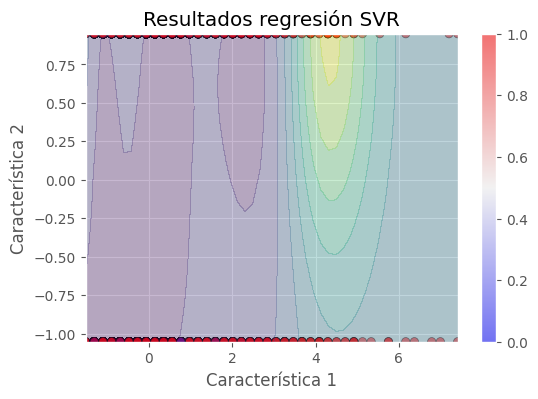

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Asegúrate de que X_train tenga exactamente dos características
X_train_2d = X_train.iloc[:, :2].to_numpy()  # Usando las dos primeras características

# Convertir y_train a valores numéricos
# Asegúrate de que y_train sea una serie de pandas que contiene valores numéricos
# Si 'PPACumulado' es categórico, necesitas transformarlo a numérico
# Suponiendo que y_train contiene etiquetas categóricas, se puede utilizar LabelEncoder:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Estandarizar las características
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_2d)

# Entrenar el modelo SVR
modelo = SVR(kernel='rbf')
modelo.fit(X_train_scaled, y_train_encoded)  # Asegúrate de usar y_train_encoded

# Crear una malla para las predicciones
x_range = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 50)
y_range = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 50)
Y, X = np.meshgrid(y_range, x_range)  # Crear la malla

# Crear un grid que tenga el mismo número de características que el modelo
grid = np.zeros((X.size, 2))  # Iniciar el grid con ceros
grid[:, 0] = X.ravel()  # Primera característica
grid[:, 1] = Y.ravel()  # Segunda característica

# Predecir valores en el grid
pred_grid = modelo.predict(grid)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(6, 4))
sc = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_encoded, edgecolor='k', alpha=0.5)  # Graficar puntos de entrenamiento
ax.set_title("Resultados regresión SVR")
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")

# Dibujar las predicciones en la malla
pred_grid_reshaped = pred_grid.reshape(X.shape)
ax.contourf(X, Y, pred_grid_reshaped, alpha=0.3, cmap='viridis')

# Añadir barra de color
plt.colorbar(sc, ax=ax)

plt.show()


se presentan los resultados de la regresión de soporte vectorial (SVR) utilizando las dos primeras características del conjunto de entrenamiento, las cuales han sido estandarizadas para mejorar el rendimiento del modelo. Los puntos de dispersión representan los datos de entrenamiento, coloreados según las etiquetas categóricas transformadas a valores numéricos. Superpuestos a estos puntos, las áreas de color en el fondo representan las predicciones del modelo, mostradas como contornos, lo que permite observar cómo el modelo clasifica y predice los valores en función de las características seleccionadas. La barra de color indica la escala de las predicciones, proporcionando una referencia visual de la variación en los resultados del modelo.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],  # Puedes agregar otros kernels si lo deseas
    'epsilon': [0.1, 0.2, 0.5]  # Parámetro epsilon
}

# Crear el modelo SVR
modelo = SVR()

# Crear el objeto GridSearchCV
grid = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Entrenar el modelo con GridSearchCV
grid.fit(X_train, y_train)

# Mejores hiperparámetros por validación cruzada
# ==============================================================================

print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(f"Mejores hiperparámetros: {grid.best_params_}")
print(f"Mejor puntuación (mean test score): {-grid.best_score_}")  # Negamos el puntaje porque usamos 'neg_mean_squared_error'
print(f"Métrica utilizada: {grid.scoring}")

# Asignar el mejor estimador a modelo
modelo = grid.best_estimator_


realiza una búsqueda de hiperparámetros para optimizar un modelo de regresión de soporte vectorial (SVR) utilizando GridSearchCV. Se definen varios parámetros, incluyendo C (coeficiente de regularización), el tipo de kernel (linear o radial) y epsilon (margen de error permitido en las predicciones). Luego, se crea un objeto GridSearchCV que evalúa cada combinación de estos parámetros mediante validación cruzada de 5 pliegues, utilizando el error cuadrático medio negativo como métrica de evaluación. Después de ajustar el modelo, el código imprime los mejores hiperparámetros encontrados y la mejor puntuación, que es la puntuación de error cuadrático medio negada para que sea más fácil de interpretar. Finalmente, se asigna el mejor estimador al objeto modelo para utilizarlo en futuras predicciones, asegurando que se emplee la configuración óptima del modelo.

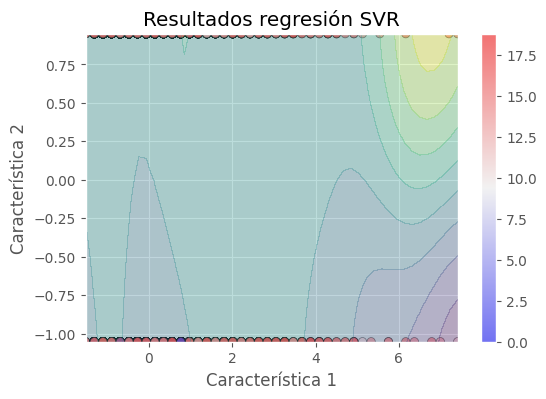

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Asegúrate de que X_train tenga exactamente dos características
X_train_2d = X_train.iloc[:, :2].to_numpy()  # Usando las dos primeras características
y_train_values = y_train.to_numpy().flatten()  # Convertir y_train a un array 1D

# Estandarizar las características
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_2d)

# Entrenar el modelo SVR
modelo = SVR(kernel='rbf')
modelo.fit(X_train_scaled, y_train_values)

# Crear una malla para las predicciones
x_range = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 50)
y_range = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 50)
Y, X = np.meshgrid(y_range, x_range)  # Crear la malla

# Crear un grid que tenga el mismo número de características que el modelo
grid = np.zeros((X.size, 2))  # Iniciar el grid con ceros
grid[:, 0] = X.ravel()  # Primera característica
grid[:, 1] = Y.ravel()  # Segunda característica

# Predecir valores en el grid
pred_grid = modelo.predict(grid)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(6, 4))
sc = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_values, edgecolor='k', alpha=0.5)  # Graficar puntos de entrenamiento
ax.set_title("Resultados regresión SVR")
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")

# Dibujar las predicciones en la malla
pred_grid_reshaped = pred_grid.reshape(X.shape)
ax.contourf(X, Y, pred_grid_reshaped, alpha=0.3, cmap='viridis')

# Añadir barra de color
plt.colorbar(sc, ax=ax)

plt.show()



se ilustran los resultados de la regresión de soporte vectorial (SVR) utilizando las dos primeras características del conjunto de entrenamiento, que han sido estandarizadas para mejorar el rendimiento del modelo. Los puntos de dispersión representan los datos de entrenamiento, coloreados de acuerdo con los valores de y_train, lo que permite observar su distribución en el espacio de características. Superpuestos a estos puntos, las áreas coloreadas en el fondo representan las predicciones del modelo, trazadas como contornos que muestran cómo el modelo estima los valores en función de las características seleccionadas. La barra de color proporciona una referencia visual para interpretar los valores predichos, facilitando la comparación entre los datos reales y las predicciones del modelo.

In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.values.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)

# Mostrar la matriz de confusión
print(confusion_matrix)

muestra la matriz de confusión para evaluar el rendimiento del modelo en el conjunto de prueba. Utiliza pd.crosstab para comparar los valores reales de la variable objetivo (y_test) con las predicciones realizadas por el modelo. Las filas de la matriz representan las clases reales, mientras que las columnas representan las clases predichas. Esta matriz permite visualizar cuántas instancias de cada clase fueron correctamente clasificadas y cuántas fueron mal clasificadas, proporcionando una comprensión clara de cómo se desempeñó el modelo en términos de precisión y errores en las clasificaciones. Al imprimir la matriz, se puede analizar de manera más detallada el rendimiento del modelo.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Suponiendo que ya has entrenado el modelo y tienes y_test y X_test
# Realiza predicciones
predicciones = modelo.predict(X_test)

# Si el modelo es SVR y deseas convertir las predicciones a un formato adecuado para la matriz de confusión
# Puedes definir un umbral para clasificar
umbral = 0.5  # Ajusta esto según el contexto de tu problema
predicciones_clasificadas = (predicciones >= umbral).astype(int)  # Clasificar como 0 o 1

# Matriz de confusión de las predicciones de test
# ==============================================================================

confusion_matrix = pd.crosstab(
    y_test,  # Asegúrate de que y_test sea un vector unidimensional
    predicciones_clasificadas,
    rownames=['Real'],
    colnames=['Predicción']
)

print(confusion_matrix)

